# Self Organizing Maps (Kohonen Maps)

Self organizing maps (SOMs) are a special type of ANNs that are trained using the unsupervised learning technique to produce a low-dimensional, descretized representation of the input space. SOMs are different from the ANNs as they do not apply any error-correction methodolgy like back-propagation. They use a neighborhood function to preserve the topological properties of the input space.  

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
X = dataset.iloc[:, :-1].values

In [5]:
y = dataset.iloc[:, -1].values

# Scaling the Dataset
Scaling the data from 0 to 1 for every feature column

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))

In [8]:
X = scaler.fit_transform(X)

# Importing minisom.py for SOM implementation

In [9]:
from minisom import MiniSom

### Instantiating an SOM object

In [10]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

### Inititalizing weights randomly

In [11]:
som.random_weights_init(X)

### Training the SOM for 100 iteration on the data X

In [12]:
som.train_random(data=X, num_iteration=100)

# Visualising the SOM

In [13]:
from pylab import bone, pcolor, colorbar, plot, show

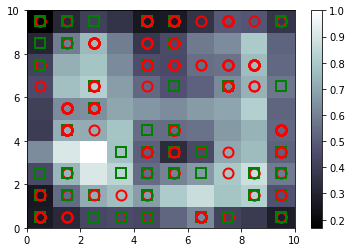

In [14]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2)
    
show()